In [2]:
import astropy.units as u
from specutils import Spectrum1D
from astrodb_utils.spectra import check_spectrum_plottable
import os
import numpy as np
import matplotlib.pyplot as plt

INFO     - astrodb_utils.publications - logger.parent.name: astrodb_utils, logger.parent.level: 20


In [3]:
files = ["/Users/guanying/SIMPLE_Archive/SIMPLE-db/scripts/spectra_convert/BONES Archive/BONES SPECTRA/BCSpec_1227m0447.txt",
         "/Users/guanying/SIMPLE_Archive/SIMPLE-db/scripts/spectra_convert/BONES Archive/BONES SPECTRA/BCSpec_1411m4524.txt",
         "/Users/guanying/SIMPLE_Archive/SIMPLE-db/scripts/spectra_convert/BONES Archive/BONES SPECTRA/BCSpec_1614m8151.txt"]

Processing file: BCSpec_1227m0447.txt


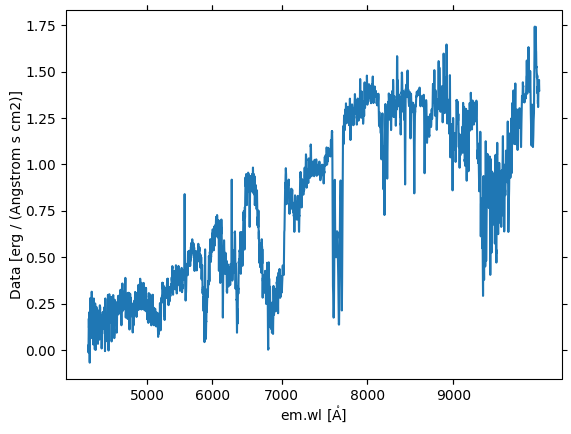

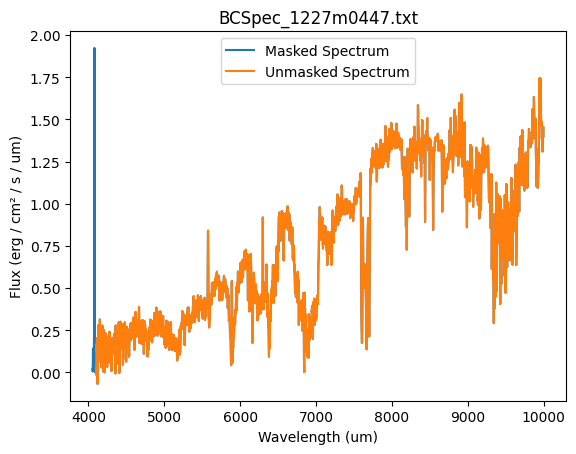

Processing file: BCSpec_1411m4524.txt


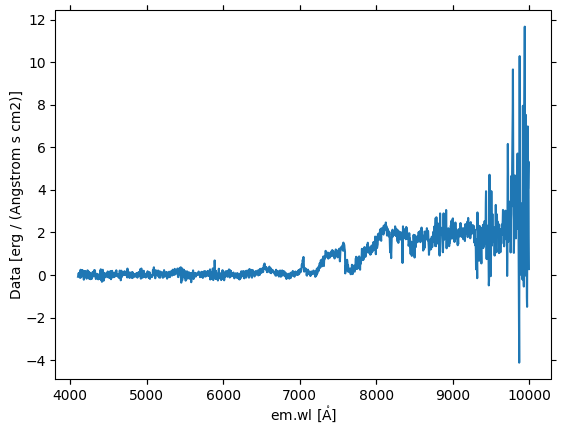

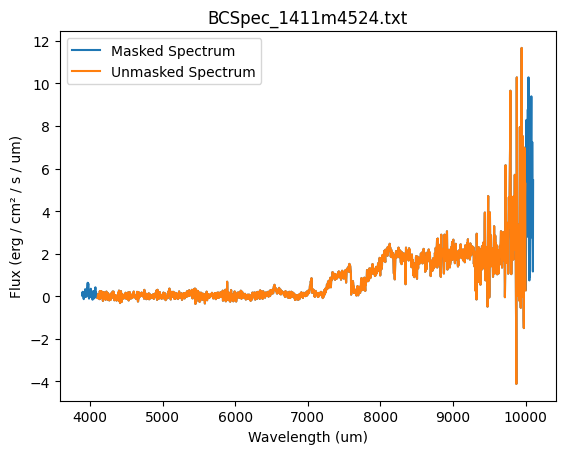

Processing file: BCSpec_1614m8151.txt


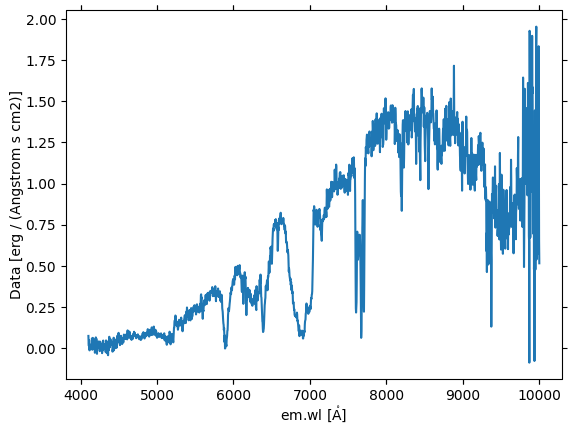

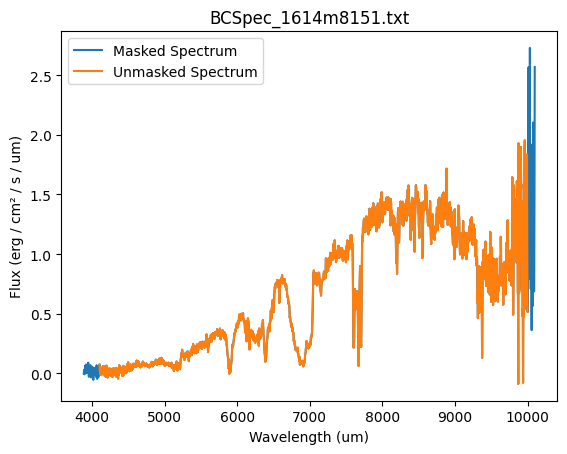

In [19]:
"""  Process source with BCSec spectra: Telescope: LCO-duP
Read the data on two columns:
#1: wavelength      #2: flux
"""
from specutils import Spectrum

import matplotlib.pyplot as plt
for file in files:

    data = np.loadtxt(file, comments="#")
    print(f"Processing file: {os.path.basename(file)}")

    wavelength = data[:, 0] * u.Angstrom
    flux = data[:, 1] * u.erg/(u.cm**2 * u.s * u.Angstrom)

    
    mask = np.logical_or(wavelength.value < 4100, wavelength.value > 10000)

    # Create Spectrum object
    spectrum = Spectrum(
        flux=flux,
        spectral_axis=wavelength,
        mask=mask
    )
    spectrum.plot()
    fig, ax = plt.subplots()
    ax.plot(spectrum.spectral_axis, spectrum.flux, label='Masked Spectrum')
    ax.plot(spectrum.spectral_axis[~spectrum.mask], spectrum.flux[~spectrum.mask], label='Unmasked Spectrum')
    ax.legend()
    ax.set_title(os.path.basename(file))
    ax.set_xlabel("Wavelength (um)")
    ax.set_ylabel("Flux (erg / cm² / s / um)")
    plt.show()